In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [48]:
from tensorflow.keras.datasets import fashion_mnist

In [49]:
(x_tr,y_tr),(x_te,y_te) = fashion_mnist.load_data()
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_tr.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


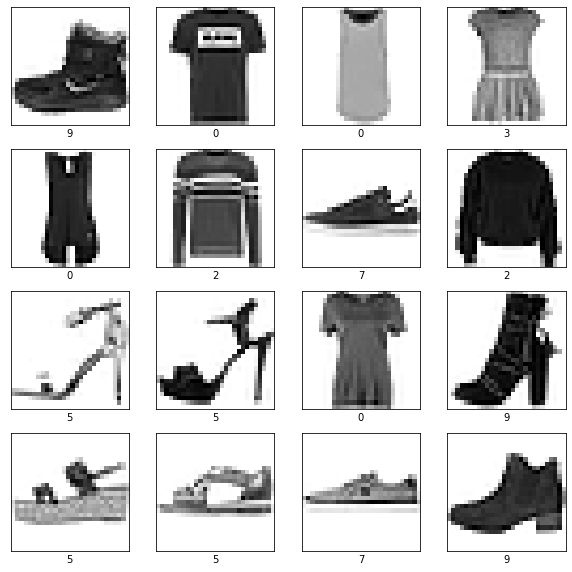

In [50]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr[i],cmap=plt.cm.binary)
    plt.xlabel(y_tr[i])
plt.show()

In [51]:
print(list(set(y_tr)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [52]:
x_tr = x_tr[:5000,:,:]
x_te = x_te[:1000,:,:]
y_tr = y_tr[:5000]
y_te = y_te[:1000]

print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [53]:
x_tr[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [54]:
####preprocessing on trainig and test data

In [55]:
x_tr = x_tr.reshape(5000,28,28,1)
x_te = x_te.reshape(1000,28,28,1)

x_tr = x_tr/255
x_te = x_te/255

print(x_tr.shape)
print(x_te.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)


In [67]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### build CNN archihtecture -1


In [69]:
y_tr[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [87]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2),strides=2))

m1.add(Conv2D(64,(3,3),strides=1,activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2),strides=2))

m1.add(Flatten())
m1.add(Dense(64,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
h1 = m1.fit(x_tr,y_tr,epochs=5,validation_data=(x_te,y_te))

Epoch 1/5
157/157 [==============================] - 8s 35ms/step - loss: 0.8580 - accuracy: 0.6934 - val_loss: 0.6124 - val_accuracy: 0.7760
Epoch 2/5
157/157 [==============================] - 6s 36ms/step - loss: 0.5342 - accuracy: 0.8040 - val_loss: 0.5471 - val_accuracy: 0.8020
Epoch 3/5
157/157 [==============================] - 6s 37ms/step - loss: 0.4513 - accuracy: 0.8404 - val_loss: 0.5229 - val_accuracy: 0.8220
Epoch 4/5
157/157 [==============================] - 6s 38ms/step - loss: 0.4012 - accuracy: 0.8494 - val_loss: 0.4824 - val_accuracy: 0.8310
Epoch 5/5
157/157 [==============================] - 6s 41ms/step - loss: 0.3616 - accuracy: 0.8704 - val_loss: 0.4791 - val_accuracy: 0.8430


In [89]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,0.857971,0.6934,0.612396,0.776,0
1,0.534221,0.8040,0.547140,0.802,1
2,0.451306,0.8404,0.522851,0.822,2
3,0.401240,0.8494,0.482401,0.831,3
4,0.361637,0.8704,0.479109,0.843,4


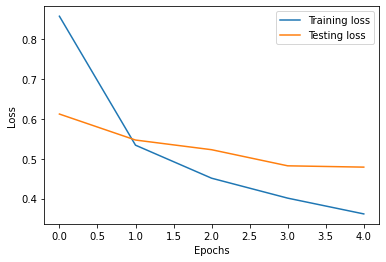

In [90]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

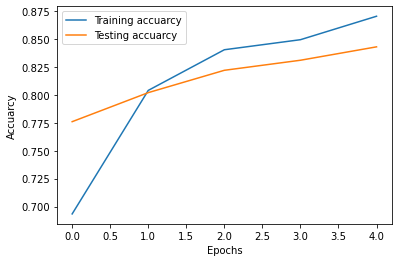

In [91]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuarcy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [92]:
ypred_m1 = m1.predict(x_te) # (1000,28,28,1)
print(ypred_m1)

[[1.45849435e-06 5.67265658e-07 2.74724493e-06 ... 2.93229278e-02
  1.09344942e-03 9.68719959e-01]
 [4.08090491e-05 5.11648235e-09 9.68947411e-01 ... 8.39855963e-11
  1.46824741e-05 8.55536197e-10]
 [1.21043422e-06 9.99998450e-01 2.10339923e-09 ... 1.00582103e-08
  2.43042795e-08 6.08187806e-11]
 ...
 [1.27765792e-03 8.81740652e-06 3.75184476e-01 ... 1.38815392e-06
  5.62039437e-03 1.29729779e-05]
 [3.31348972e-04 2.16651097e-04 4.16069088e-04 ... 9.67872798e-01
  3.98003263e-03 8.66259041e-04]
 [4.86412375e-07 3.02977497e-07 8.95584833e-07 ... 9.99887466e-01
  2.14248830e-05 1.35834125e-05]]


In [93]:
ypred_m1 = [np.argmax(i) for i in ypred_m1]
print(ypred_m1)

[9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 6, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 6, 7, 2, 1, 2, 6, 2, 6, 5, 6, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 6, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 6, 4, 1, 3, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 6, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 6, 2, 8, 6, 6, 6, 2, 9, 7, 0, 5, 5, 6, 8, 5, 6, 3, 0, 4, 8, 0, 0, 6, 3, 6, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 6, 2, 4, 7, 1, 6, 2, 8, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

In [94]:
cm = confusion_matrix(y_te,ypred_m1)
print(cm)
print(classification_report(y_te,ypred_m1))

[[ 90   0   3   5   0   0   8   0   1   0]
 [  0 100   0   4   0   0   1   0   0   0]
 [  2   0  81   1   5   0  22   0   0   0]
 [  2   0   0  79   2   0   8   0   2   0]
 [  0   0  11   5  75   0  24   0   0   0]
 [  0   0   0   0   0  79   0   6   0   2]
 [ 11   0   5   4   4   0  73   0   0   0]
 [  0   0   0   0   0   2   0  88   1   4]
 [  1   0   0   0   0   0   6   0  88   0]
 [  0   0   0   0   0   2   0   3   0  90]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       1.00      0.95      0.98       105
           2       0.81      0.73      0.77       111
           3       0.81      0.85      0.83        93
           4       0.87      0.65      0.75       115
           5       0.95      0.91      0.93        87
           6       0.51      0.75      0.61        97
           7       0.91      0.93      0.92        95
           8       0.96      0.93      0.94        95
           9       0.94     

## build CNN architecture-2

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
y_tr1 = to_categorical(y_tr)
y_te1 = to_categorical(y_te)
print(y_tr1.shape)
print(y_te1.shape)

(5000, 10)
(1000, 10)


In [97]:
y_tr1[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [98]:
m2 = Sequential()
m2.add(Conv2D(64,(3,3),strides=1,activation='relu',input_shape=(28,28,1)))
m2.add(MaxPooling2D(pool_size=(2,2),strides=2))

m2.add(Conv2D(32,(3,3),strides=1,activation='relu'))
m2.add(MaxPooling2D(pool_size=(2,2),strides=2))

m2.add(Flatten())
m2.add(Dense(64,activation='relu'))
m2.add(Dense(10,activation='softmax'))

m2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
h2 = m2.fit(x_tr,y_tr1,epochs=5,validation_data=(x_te,y_te1))

Epoch 1/5
157/157 [==============================] - 6s 36ms/step - loss: 0.9936 - accuracy: 0.6370 - val_loss: 0.7076 - val_accuracy: 0.7230
Epoch 2/5
157/157 [==============================] - 5s 35ms/step - loss: 0.5490 - accuracy: 0.7982 - val_loss: 0.5569 - val_accuracy: 0.7990
Epoch 3/5
157/157 [==============================] - 5s 34ms/step - loss: 0.4671 - accuracy: 0.8302 - val_loss: 0.5364 - val_accuracy: 0.8030
Epoch 4/5
157/157 [==============================] - 5s 34ms/step - loss: 0.4234 - accuracy: 0.8458 - val_loss: 0.4854 - val_accuracy: 0.8300
Epoch 5/5
157/157 [==============================] - 5s 34ms/step - loss: 0.3861 - accuracy: 0.8650 - val_loss: 0.4510 - val_accuracy: 0.8480


In [100]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
0,0.993571,0.6370,0.707568,0.723,0
1,0.549019,0.7982,0.556881,0.799,1
2,0.467120,0.8302,0.536364,0.803,2
3,0.423431,0.8458,0.485365,0.830,3
4,0.386070,0.8650,0.450968,0.848,4


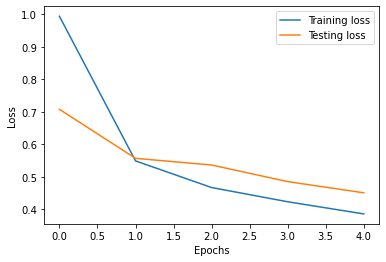

In [101]:
plt.plot(r2['Epochs'],r2['loss'],label='Training loss')
plt.plot(r2['Epochs'],r2['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

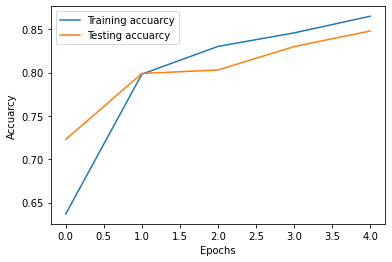

In [102]:
plt.plot(r2['Epochs'],r2['accuracy'],label='Training accuarcy')
plt.plot(r2['Epochs'],r2['val_accuracy'],label='Testing accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [103]:
ypred_m2 = m2.predict(x_te)
print(ypred_m2)

[[3.49342045e-05 8.94353525e-06 4.39234100e-05 ... 5.20363301e-02
  2.88952072e-03 9.33093965e-01]
 [2.78895284e-04 1.26109171e-07 9.54949617e-01 ... 4.62971966e-10
  1.13567352e-04 2.49809909e-06]
 [2.16542685e-06 9.99989867e-01 6.28134771e-08 ... 7.25407678e-10
  3.02151477e-07 8.67858230e-10]
 ...
 [2.62781419e-03 1.56206370e-04 2.47603476e-01 ... 2.84360368e-07
  3.26929474e-03 1.03146216e-04]
 [1.30088802e-03 5.27142314e-04 2.22591159e-04 ... 9.56244946e-01
  1.76984211e-03 2.13176501e-03]
 [2.98646210e-05 5.95281608e-06 2.51729944e-06 ... 9.99001563e-01
  3.17189806e-05 7.78546382e-05]]


In [104]:
ypred_m2 = [np.argmax(i) for i in ypred_m2]
print(ypred_m2)

[9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 2, 6, 0, 9, 4, 8, 5, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9, 4, 7, 2, 1, 4, 6, 2, 2, 5, 6, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 2, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4, 1, 3, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 6, 5, 4, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 2, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 2, 7, 2, 8, 5, 2, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 6, 6, 2, 9, 7, 6, 5, 5, 4, 8, 5, 6, 3, 0, 4, 8, 0, 0, 6, 3, 6, 9, 0, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 2, 3, 6, 4, 6, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 3, 3, 3, 6, 8, 6, 0, 2, 9, 7, 7, 1, 3, 2, 6, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

In [105]:
y_te1[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [106]:
cm_m2 = confusion_matrix(y_te,ypred_m2)
print(cm_m2)
print(classification_report(y_te,ypred_m2))

[[ 79   1   3   4   0   1  18   0   1   0]
 [  0 103   0   1   0   0   1   0   0   0]
 [  2   0  95   1   6   0   7   0   0   0]
 [  2   0   2  78   3   0   6   0   2   0]
 [  0   0  10   2  88   0  15   0   0   0]
 [  0   0   0   0   0  80   0   5   0   2]
 [  6   0  17   5  11   0  58   0   0   0]
 [  0   0   0   0   0   2   0  88   0   5]
 [  0   0   1   1   0   2   3   0  88   0]
 [  0   0   0   0   0   1   0   3   0  91]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       107
           1       0.99      0.98      0.99       105
           2       0.74      0.86      0.79       111
           3       0.85      0.84      0.84        93
           4       0.81      0.77      0.79       115
           5       0.93      0.92      0.92        87
           6       0.54      0.60      0.57        97
           7       0.92      0.93      0.92        95
           8       0.97      0.93      0.95        95
           9       0.93     

In [107]:
m1.save('fashion_minst_m2.h5')

In [108]:
from tensorflow.keras.models import load_model

In [109]:
model = load_model('fashion_minst_m2.h5')


In [110]:
res = model.predict(x_te[:10])
res

array([[1.45849435e-06, 5.67265658e-07, 2.74724493e-06, 6.11527014e-07,
        4.10577850e-05, 8.14614294e-04, 2.56792805e-06, 2.93229278e-02,
        1.09344942e-03, 9.68719959e-01],
       [4.08090491e-05, 5.11648235e-09, 9.68947411e-01, 7.86515957e-05,
        2.53788801e-03, 5.12517779e-08, 2.83805281e-02, 8.39855963e-11,
        1.46824741e-05, 8.55536197e-10],
       [1.21043422e-06, 9.99998450e-01, 2.10339923e-09, 1.88277056e-07,
        6.58905890e-08, 5.30235467e-10, 3.36321193e-08, 1.00582103e-08,
        2.43042795e-08, 6.08187806e-11],
       [1.91474351e-06, 9.99887466e-01, 1.47474433e-08, 1.08652632e-04,
        8.24124243e-07, 5.89712368e-09, 9.35808430e-07, 5.40816494e-08,
        1.32183203e-07, 9.95286431e-09],
       [8.40074383e-03, 2.45414762e-04, 4.17639799e-02, 1.26948440e-02,
        3.83440703e-02, 2.59287015e-04, 8.97525191e-01, 5.37957067e-06,
        7.27615785e-04, 3.33906210e-05],
       [2.52728551e-05, 9.99969006e-01, 3.25398048e-07, 1.34715503e-06,
   

## MNIST digit dataset

In [82]:
from tensorflow.keras.datasets import mnist

In [85]:
(x_tr2,y_tr2),(x_te2,y_te2) = mnist.load_data()
print(x_tr2.shape)
print(x_te2.shape)
print(y_tr2.shape)
print(y_tr2.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(60000,)


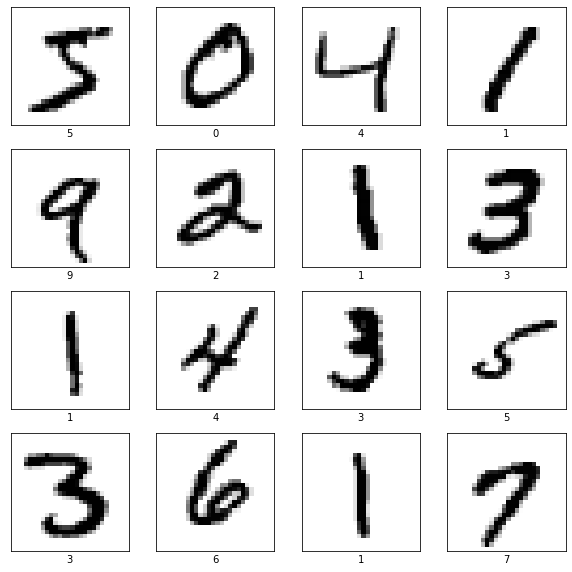

In [86]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr2[i],cmap=plt.cm.binary)
    plt.xlabel(y_tr2[i])
plt.show()

In [112]:
!pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=3d961c656b271a1ab456eece37a0971fc843cfbe921745708a554b598ae91de5
  Stored in directory: c:\users\oem\appdata\local\pip\cache\wheels\50\93\f8\4f0a42a03a06626d675f13907b6982ad5ecff383530af5a900
Successfully built blinker
